In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\sathish kumar\Downloads\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.keys()
#data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Id                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
SepalLengthCm    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
SepalWidthCm     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
PetalLengthCm       AxesSubplot(0.125,0.391471;0.227941x0.222059)
PetalWidthCm     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

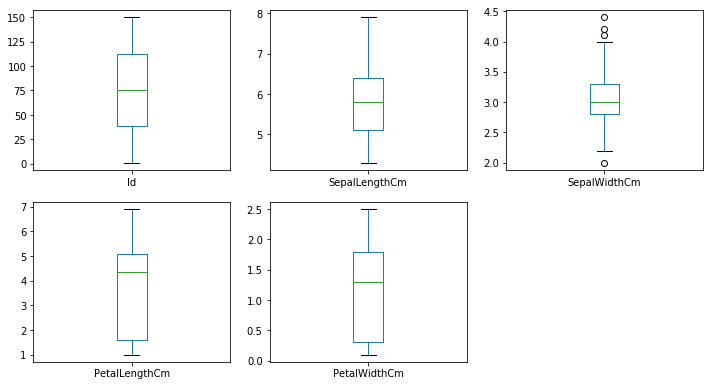

In [9]:
data.plot(kind= 'box' , subplots=True, layout=(3,3), figsize=(12,10))

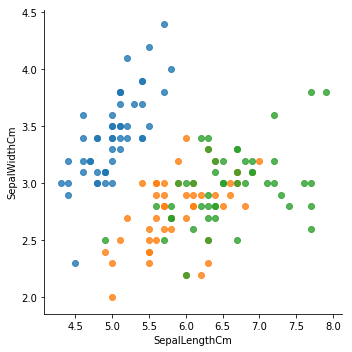

In [10]:
sns.lmplot( x="SepalLengthCm", y="SepalWidthCm", data=data, fit_reg=False, hue='Species', legend=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F14DF36FD0>,
      dtype=object)

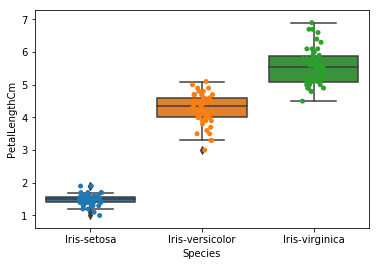

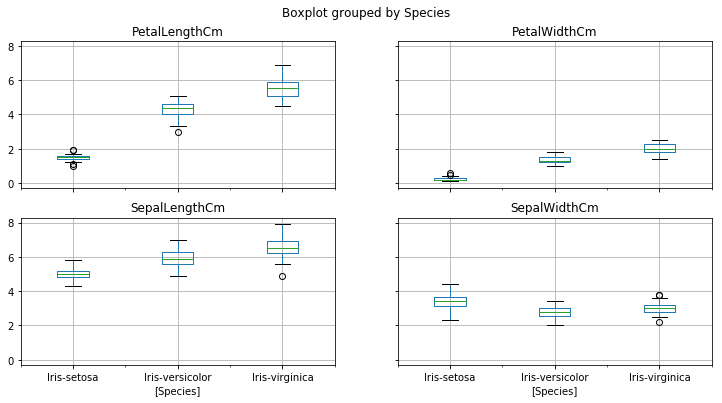

In [11]:
#We can add a boxplot for each feature to check how the feature ranges varies for each type of Species
graph1 = sns.boxplot(x="Species", y="PetalLengthCm", data=data)
graph1 = sns.stripplot(x="Species", y="PetalLengthCm", data=data, jitter=True)

#This graph shows that the Iris-setosa has small Petal Length compared to the other two
#The dots are the actual PetalLength of each row 
#We can see that versivolor and virginica length's range overlap

data.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6)) #Done using pandas package for the others

In [12]:
#Drop Id and Species column
data1=data.drop(['Id','Species'],axis=1)
print(data1.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [13]:
#We will first try KMeans model without Standardizing the features
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3) #Since we have three Species here
model.fit(data1)
labels=model.predict(data1) #Labels indicate the cluster assigned to each row, starting from 0-->2
print(labels)

#Get the centroids for each cluster
centroids=model.cluster_centers_
print(centroids) 
#There are four columns, but we use 0, 1 for x and y of centroids, not sure what the other two is for yet
cen_x=centroids[:,0]
cen_y=centroids[:,1]
#Create a new dataframe for this
cent=pd.DataFrame(data=centroids[:,:2],columns=["X","Y"]) 
print(cent)

#add labels to the data1 dataset
data1['Labels']=labels
print(data1.head())

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
          X         Y
0  5.901613  2.748387
1  5.006000  3.418000
2  6.850000  3.073684
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Labels
0            5.1           3.5            1.4           0.2       1
1            4.9           3.0            1.4           0.2       1
2            4.7           3.2            1.3           0.2       1
3            4.6           3.1            1.5           0.2       1
4            5.0           3.6            1.4           0.2       1


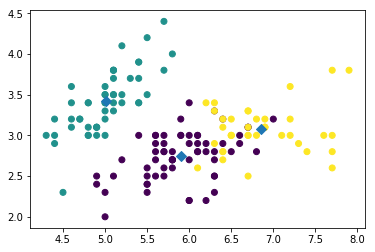

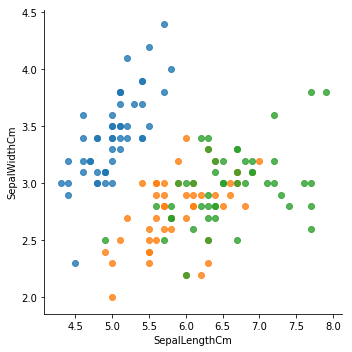

In [14]:
#Predicted one:
xs=data1.iloc[:,0]
ys=data1.iloc[:,1]
zs=data1.iloc[:,4]
plt.scatter(xs,ys,c=zs)
plt.scatter(cen_x,cen_y,marker='D',s=50)

#Original Species model
sns.lmplot( x="SepalLengthCm", y="SepalWidthCm", data=data, fit_reg=False, hue='Species', legend=False)

In [15]:
x=data.drop(['Id','Species'],axis=1)
y=data['Species']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.25, random_state = 100)

In [17]:
x_train.shape

(112, 4)

In [18]:
y_train.shape

(112,)

In [19]:
x_test.shape

(38, 4)

In [20]:
y_test.shape

(38,)

In [21]:
from sklearn.cluster import KMeans
km=KMeans()
km.fit(x_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

y_pred=km.predict(x_test)
y_pred

In [22]:
km.labels_

array([2, 1, 0, 3, 7, 7, 0, 0, 0, 6, 3, 0, 6, 0, 5, 7, 1, 3, 1, 3, 7, 2,
       3, 0, 2, 2, 1, 6, 0, 1, 6, 6, 6, 5, 2, 2, 1, 6, 5, 1, 0, 5, 4, 1,
       6, 3, 3, 1, 5, 3, 3, 2, 1, 0, 1, 6, 5, 7, 2, 3, 3, 6, 6, 0, 6, 1,
       6, 0, 5, 6, 2, 5, 2, 6, 1, 7, 0, 4, 3, 3, 2, 3, 5, 0, 0, 6, 2, 3,
       5, 6, 2, 2, 7, 5, 4, 5, 4, 7, 2, 0, 6, 3, 3, 4, 3, 1, 4, 3, 2, 3,
       0, 0])

In [23]:
km.cluster_centers_

array([[4.68888889, 3.12222222, 1.4       , 0.18888889],
       [6.        , 2.77142857, 5.03571429, 1.80714286],
       [6.55      , 3.10625   , 5.5625    , 2.16875   ],
       [5.695     , 2.73      , 4.21      , 1.34      ],
       [5.2       , 2.36666667, 3.4       , 1.03333333],
       [6.50833333, 3.04166667, 4.625     , 1.44166667],
       [5.25      , 3.65555556, 1.51111111, 0.28888889],
       [7.425     , 3.2375    , 6.2375    , 2.025     ]])

In [25]:
#Evaluating the cluster
species=data['Species']
data2=pd.DataFrame({'Labels':labels,'Species':species})
print(data2.head())

print(pd.crosstab(data2['Labels'],data['Species']))
#We can see here that the mdoel predicted setosa perfectly,
#but there has been mix up in versiolor and virginica

#We can also find the inertia of the model (how spread out the model is)--> lower
print(model.inertia_) 

   Labels      Species
0       1  Iris-setosa
1       1  Iris-setosa
2       1  Iris-setosa
3       1  Iris-setosa
4       1  Iris-setosa
Species  Iris-setosa  Iris-versicolor  Iris-virginica
Labels                                               
0                  0               48              14
1                 50                0               0
2                  0                2              36
78.94084142614601
